In [10]:
from google.colab import drive

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
import numpy as np

data_df = df1 = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


https://www.kaggle.com/code/farzadnekouei/heart-disease-prediction?scriptVersionId=139620766&cellId=12

In [ ]:
data_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

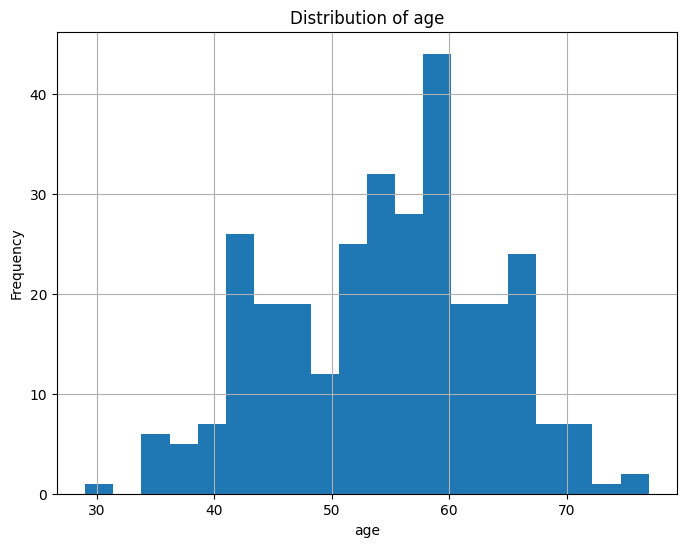

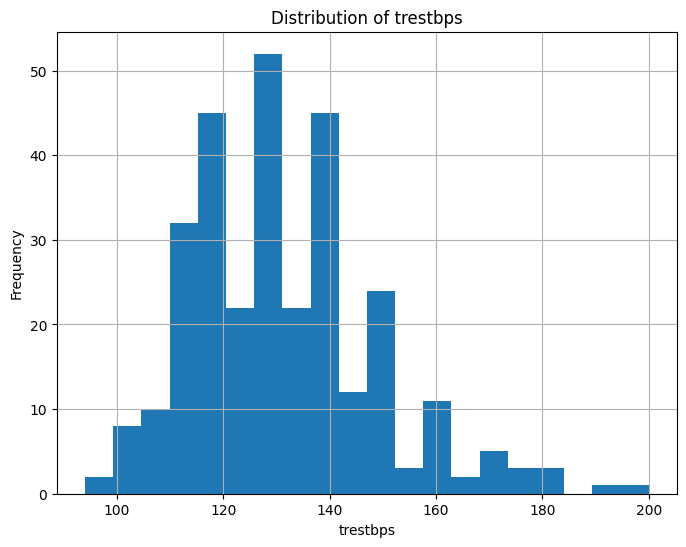

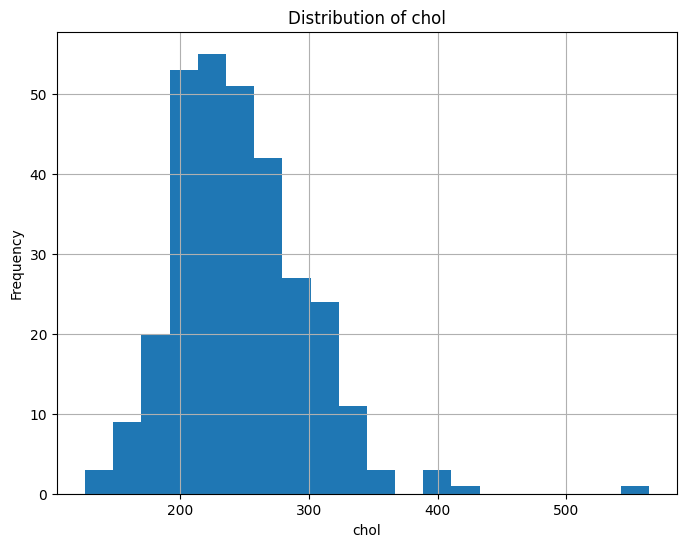

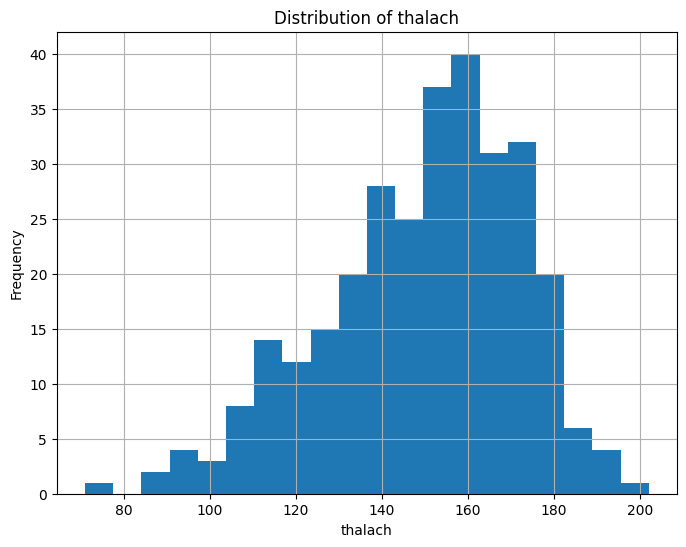

In [ ]:
import matplotlib.pyplot as plt
column = ['age','trestbps', 'chol', 'thalach' ]


for column in column:
    plt.figure(figsize=(8, 6))
    plt.hist(data_df[column], bins=20)  # Điều chỉnh số lượng bins tùy thuộc vào dữ liệu của bạn
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
ages_scaler = StandardScaler()
trestbps_scaler = StandardScaler()
chol_scaler = StandardScaler()
thalach_scaler = StandardScaler()


ages_scaler.fit(data_df[['age']])
trestbps_scaler.fit(data_df[['trestbps']])
chol_scaler.fit(data_df[['chol']])
thalach_scaler.fit(data_df[['thalach']])

StandardScaler()

In [ ]:
joblib.dump(ages_scaler, '/content/drive/MyDrive/scaler/age_scaler.pkl')
joblib.dump(trestbps_scaler, '/content/drive/MyDrive/scaler/trestbps_scaler.pkl')
joblib.dump(chol_scaler, '/content/drive/MyDrive/scaler/chol_scaler.pkl')
joblib.dump(thalach_scaler, '/content/drive/MyDrive/scaler/thalach_scaler.pkl')

['/content/drive/MyDrive/scaler/thalach_scaler.pkl']

In [ ]:
data_df['age'] = ages_scaler.transform(data_df[['age']])
data_df['trestbps'] = trestbps_scaler.transform(data_df[['trestbps']])
data_df['chol'] = chol_scaler.transform(data_df[['chol']])
data_df['thalach'] = thalach_scaler.transform(data_df[['thalach']])

In [ ]:
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = data_df.drop(columns=['target'])
y = data_df['target']

# Phân chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# In số lượng mẫu trong từng tập dữ liệu
print("Số lượng mẫu trong tập huấn luyện:", len(X_train))
print("Số lượng mẫu trong tập kiểm tra:", len(X_test))


Số lượng mẫu trong tập huấn luyện: 272
Số lượng mẫu trong tập kiểm tra: 31


In [ ]:
num_columns = X_train.shape[1]

In [ ]:
X_train.

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [ ]:
num_columns

13

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(8, activation = 'relu', input_shape =(num_columns,)),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))



Epoch 1/30
9/9 [==============================] - 1s 41ms/step - loss: 0.6574 - acc: 0.6397 - val_loss: 0.6460 - val_acc: 0.6452
Epoch 2/30
9/9 [==============================] - 0s 8ms/step - loss: 0.6496 - acc: 0.6544 - val_loss: 0.6405 - val_acc: 0.6452
Epoch 3/30
9/9 [==============================] - 0s 8ms/step - loss: 0.6422 - acc: 0.6801 - val_loss: 0.6340 - val_acc: 0.6129
Epoch 4/30
9/9 [==============================] - 0s 8ms/step - loss: 0.6350 - acc: 0.6838 - val_loss: 0.6267 - val_acc: 0.6452
Epoch 5/30
9/9 [==============================] - 0s 8ms/step - loss: 0.6282 - acc: 0.6875 - val_loss: 0.6167 - val_acc: 0.6774
Epoch 6/30
9/9 [==============================] - 0s 11ms/step - loss: 0.6193 - acc: 0.7059 - val_loss: 0.6058 - val_acc: 0.6774
Epoch 7/30
9/9 [==============================] - 0s 11ms/step - loss: 0.6104 - acc: 0.7169 - val_loss: 0.5943 - val_acc: 0.7097
Epoch 8/30
9/9 [==============================] - 0s 11ms/step - loss: 0.6019 - acc: 0.7316 - val_los

In [ ]:
model.save('/content/drive/MyDrive/Thư mục',save_format="tf")

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
